In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2021-05-24 04:53:14--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-05-24 04:53:14 (36.3 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 30.9MB/s 


In [ ]:
df = # TODO

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])

In [ ]:
Ntest = 12
train = # TODO
test = # TODO

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(
    # TODO
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.31 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.29 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.57 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.14 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.42 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 24 May 2021   AIC                            905.686
Time:                                    04:53:45   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred, confint = model.predict(
    # TODO
)

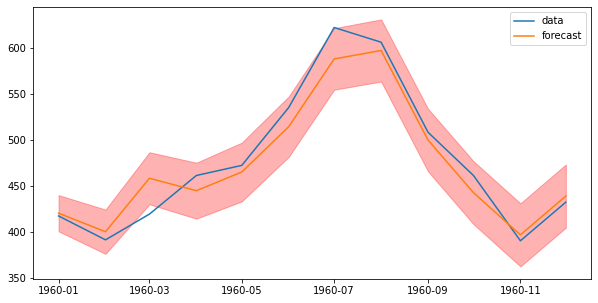

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

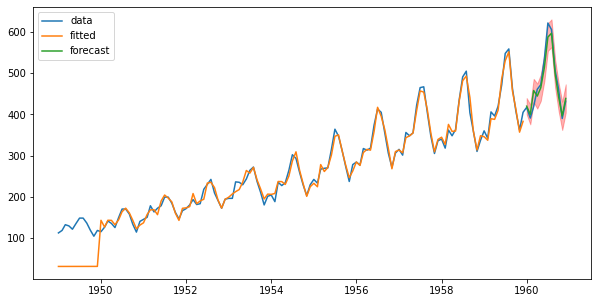

In [ ]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
logmodel = pm.auto_arima(
    # TODO
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.663, Time=2.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.67 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=1.98 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.97 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=5.13 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=1.89 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.04 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.502, Time=1.70 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.53 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-441.068, Time=2.02 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.512, Time=7.23 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [ ]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Mon, 24 May 2021   AIC                           -448.052
Time:                                      04:54:56   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.5997      0.083      7.263      0.000       0.438       0.762
ar.L2          0.2422      0.085      2.858      0.004       0.076       0.408
ma.S.L12      -0.5683      0.105     -5.436      0.000      -0.773      -0.363
sigma2         0.0012      0.000      8.194      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.07
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

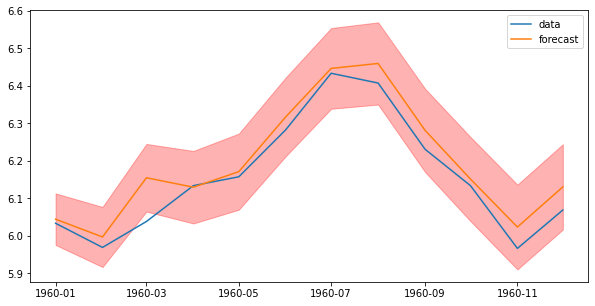

In [ ]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

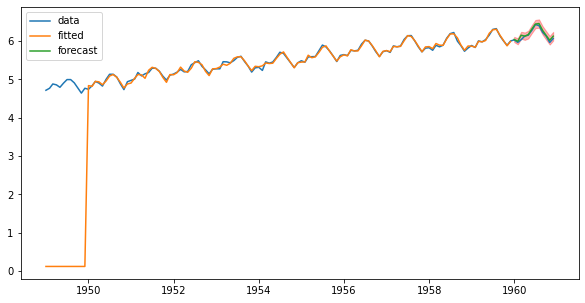

In [ ]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
### forecast RMSE
def rmse(t, y):
  # TODO

In [ ]:
print("Non-logged RMSE:", # TODO)
print("Logged RMSE:", # TODO)

Non-logged RMSE: 18.536468964799457
Logged RMSE: 23.051734622075276


In [ ]:
### non-seasonal
model = pm.auto_arima(
    # TODO
)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-213.899, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.033, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-211.110, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.009, Time=0.36 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 167.031
Date:                Mon, 24 May 2021   AIC                           -304.063
Time:                        04:55:20   BIC                           -260.821
Sample:                             0   HQIC                          -286.491
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0391      0.081      0.480      0.631      -0.121       0.199
ar.L2          0.1976      0.095      2.091      0.037       0.012       0.383
ar.L3          0.1177      0.097      1.217      0.224      -0.072       0.307
ar.L4         -0.1106      0.078     -1.410      0.158      -0.264       0.043
ar.L5          0.0346      0.076      0.456      0.649      -0.114       0.184
ar.L6          0.0724      0.078      0.923      0.356      -0.081       0.226
ar.L7         -0.0393      0.083     -0.472      0.637      -0.203       0.124
ar.L8         -0.1094      0.083     -1.312      0.190      -0.273       0.054
ar.L9         -0.0107      0.079     -0.137      0.891      -0.165       0.143
ar.L10         0.1120      0.075      1.501      0.133      -0.034       0.258
ar.L11        -0.0726      0.079     -0.913      0.361      -0.228       0.083
ar.L12         0.7690      0.079      9.722      0.000       0.614       0.924
ma.L1          0.9699      0.098      9.917      0.000       0.778       1.162
ma.L2          0.6237      0.084      7.398      0.000       0.458       0.789
sigma2         0.0038      0.001      6.890      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   4.15   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.04   Prob(JB):                         0.58
Heteroskedasticity (H):               0.51   Skew:                             0.22
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

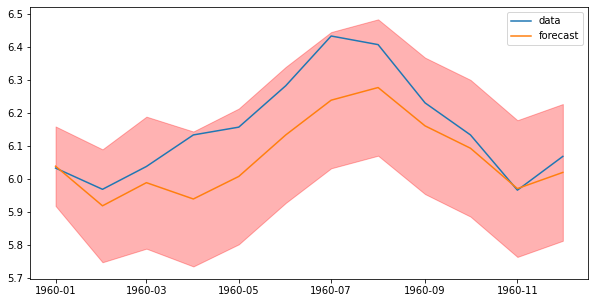

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

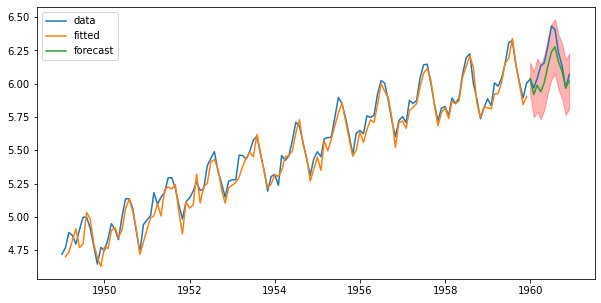

In [ ]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
rmse(test['Passengers'], # TODO)

55.214125129556216

In [ ]:
### non-seasonal non-logged
model = pm.auto_arima(
    # TODO
)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.39 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Mon, 24 May 2021   AIC                           1020.062
Time:                        04:55:49   BIC                           1066.065
Sample:                             0   HQIC                          1038.755
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.023      2.020      0.043       0.182      12.030
ar.L1         -0.0766      0.143     -0.536      0.592      -0.357       0.204
ar.L2         -0.2994      0.142     -2.113      0.035      -0.577      -0.022
ar.L3         -0.1340      0.117     -1.149      0.251      -0.363       0.095
ar.L4         -0.2844      0.115     -2.482      0.013      -0.509      -0.060
ar.L5         -0.0919      0.116     -0.791      0.429      -0.320       0.136
ar.L6         -0.3053      0.112     -2.716      0.007      -0.526      -0.085
ar.L7         -0.1006      0.124     -0.814      0.416      -0.343       0.142
ar.L8         -0.3147      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0835      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3179      0.129     -2.470      0.013      -0.570      -0.066
ar.L11        -0.0756      0.130     -0.583      0.560      -0.330       0.178
ar.L12         0.6366      0.126      5.058      0.000       0.390       0.883
ma.L1         -0.0960      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2346      0.185      1.267      0.205      -0.128       0.598
sigma2        97.8889     15.342      6.381      0.000      67.820     127.958
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

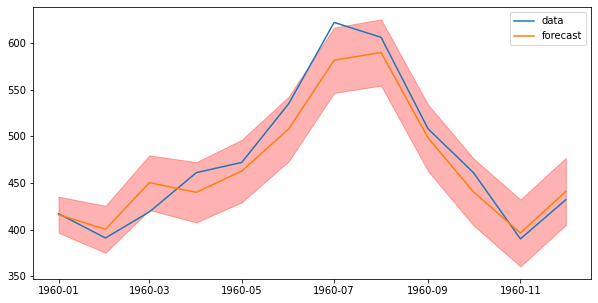

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
rmse(test['Passengers'], # TODO)

20.151063868782852

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=cWFkIiKGhgFV5RKGjNDXsg&n=ARIMA+2)